In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np 
import pickle as pk
import glob
from fbprophet import Prophet
import sys
sys.path.append('../')
import wiki
from wiki import utils 
import multiprocessing as mp
total_proc = None
from tqdm import tqdm
from IPython.display import clear_output

# Results Analysis
* ...

In [3]:
def load_plot(page, plot_y_org=True):
    forecast = pd.read_feather(PROPHET_PATH+VERSION+page+'df.f')
    wiki.newphet.prophet_plot(forecast, plot_y_org=plot_y_org)
    plt.show()

In [4]:
PROPHET_PATH = '../data/prophet/'
RESULTS_PATH = 'results/'
VERSION = 'v4/'
PREV_VERSION = 'v2.5/'

In [5]:
pagedf = pd.read_feather(PROPHET_PATH+'pagedf.f')
ds = pd.read_feather(PROPHET_PATH+'ds.f')

In [6]:
pages = [x.split('/')[-1] for x in glob.glob(PROPHET_PATH+VERSION+'*df.f')]

In [7]:
df = pd.read_feather(PROPHET_PATH+RESULTS_PATH+VERSION[:-1]+'df.f')
prev_df = pd.read_feather(PROPHET_PATH+RESULTS_PATH+PREV_VERSION[:-1]+'df.f')
page_index = pd.read_feather(PROPHET_PATH+'page_index.f')

In [8]:
prev_df[PREV_VERSION[:-1]+'_val'].mean()

55.451014890150226

In [9]:
prev_df[PREV_VERSION[:-1]+'_val'].count()

145063

In [11]:
prev_df[prev_df[PREV_VERSION[:-1]+'_val'].isnull()]

,page_index,v2.5_full,v2.5_val


In [12]:
df[VERSION[:-1]+'_val'].mean()

55.696639947139438

In [25]:
prev_df.head()

,page_index,v2.5_full,v2.5_val
0,143980,32.848804,35.069151
1,10378,19.604925,18.798956
2,117379,28.544319,28.915601
3,57096,22.277783,38.099054
4,128258,46.421259,49.896390


In [15]:
prev_df = prev_df.set_index('page_index').sort_index()
df = df.set_index('page_index').sort_index()

In [16]:
df['val_gain'] = prev_df[PREV_VERSION[:-1]+'_val'] - df[VERSION[:-1]+'_val'] 

In [20]:
df['val_gain'].sum()/len(df)

-0.24562505698920811

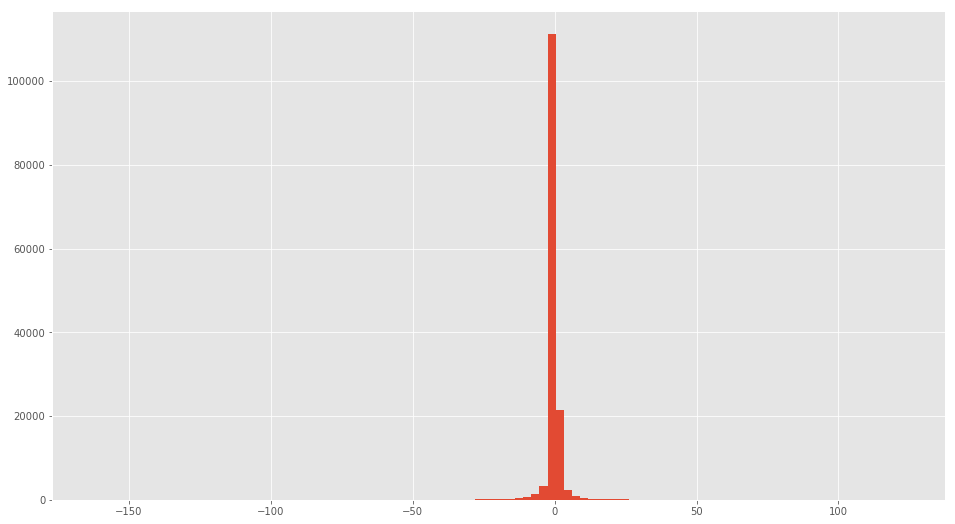

In [18]:
df.val_gain.hist(bins=100)

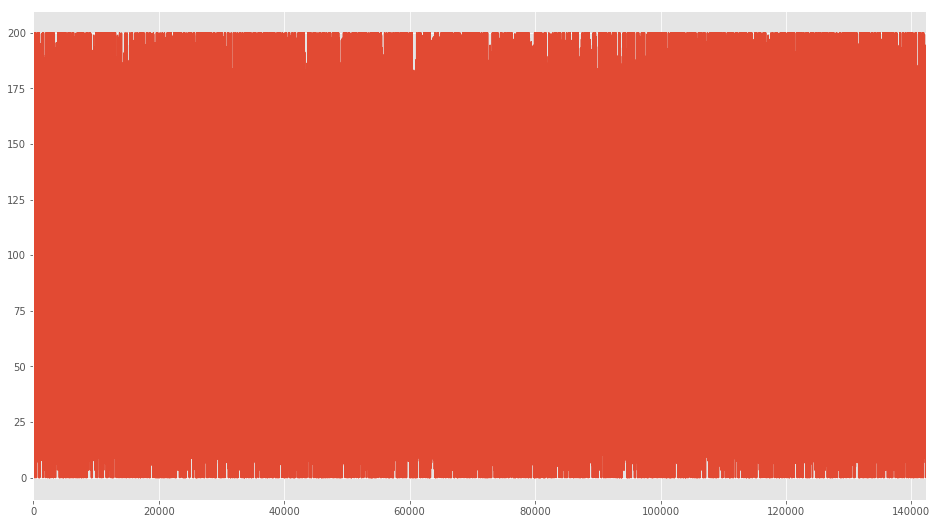

In [61]:
df[VERSION[:-1]+'_val'].plot()

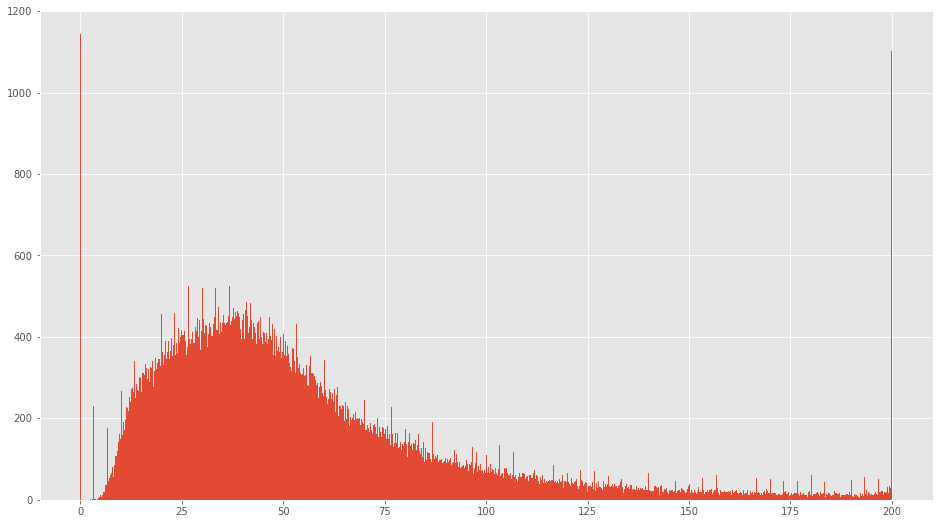

In [62]:
df[VERSION[:-1]+'_val'].sort_values().hist(bins=1000)

In [65]:
df[VERSION[:-1]+'_val'][(df[VERSION[:-1]+'_val'] > 0) & (df[VERSION[:-1]+'_val'] < 200)].mean()

54.846820475503741

In [66]:
df[VERSION[:-1]+'_val'][(df[VERSION[:-1]+'_val'] > 0) & (df[VERSION[:-1]+'_val'] < 40)].mean()

25.827863848590624

In [67]:
len(df[VERSION[:-1]+'_val'][(df[VERSION[:-1]+'_val'] > 0) & (df[VERSION[:-1]+'_val'] < 40)])

58019

In [89]:
len(df[VERSION[:-1]+'_val'][(df[VERSION[:-1]+'_val'] > 0) & (df[VERSION[:-1]+'_val'] < 30)])

36116

In [90]:
len(df[VERSION[:-1]+'_val'][(df[VERSION[:-1]+'_val'] > 0) & (df[VERSION[:-1]+'_val'] < 20)])

16466

In [72]:
df[VERSION[:-1]+'_val'].value_counts().head(20)

0.000000      1144
200.000000    1070
3.333333       227
6.666667       134
20.000000      120
10.000000      111
16.666667      104
23.333333       97
26.666667       88
30.000000       87
33.333333       87
40.000000       83
53.333333       82
13.333333       79
56.666667       76
110.000000      73
50.000000       72
46.666667       71
43.333333       71
36.666667       69
Name: v2.5_val, dtype: int64

In [ ]:
for row in df.sort_values(by=VERSION[:-1]+'_val',ascending=False).iloc[:1].iterrows():
    print('page_index', row[1][0])
    print('v1.6_val', row[1][2])
    load_plot(row[1][0])

page_index 12448
v1.6_val 0.0


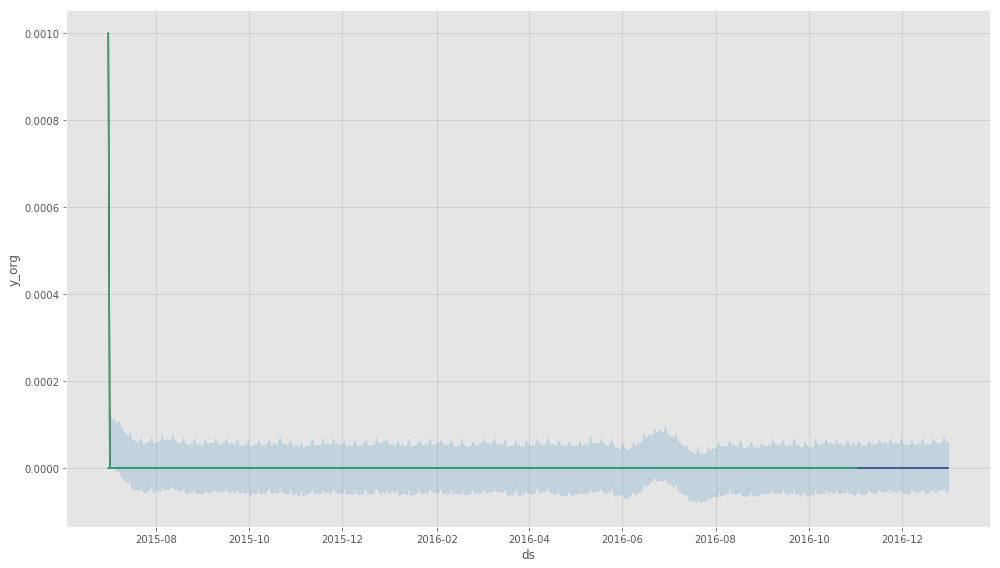

In [76]:
for row in df.sort_values(by=VERSION[:-1]+'_val',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0])
    print('v1.6_val', row[1][2])
    load_plot(row[1][0])

page_index 99484
v1.6_val 10.000033992133412


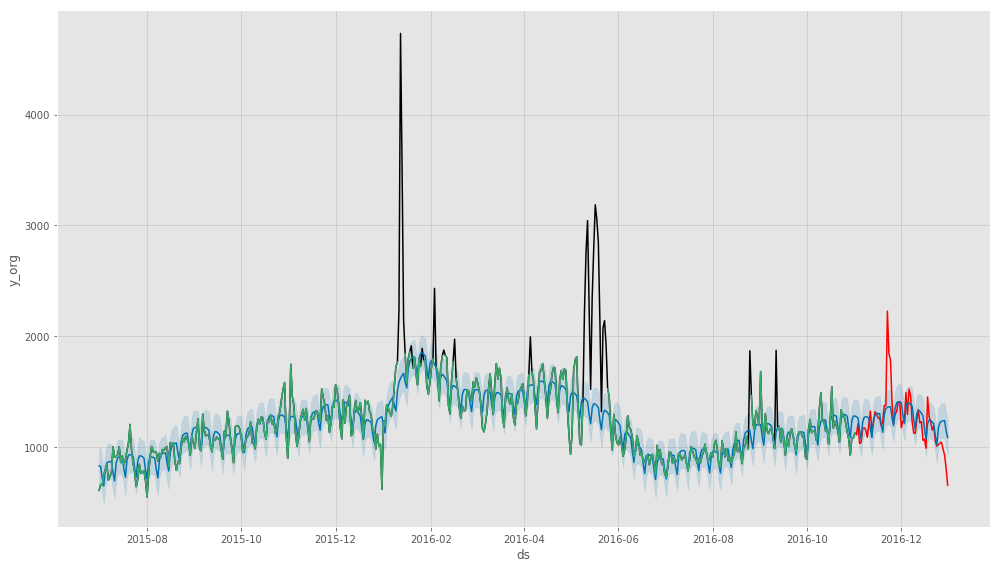

In [82]:
for row in df[(df[VERSION[:-1]+'_val'] > 10)].sort_values(
    by=VERSION[:-1]+'_val',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0])
    print('v1.6_val', row[1][2])
    load_plot(row[1][0])

page_index 98140
v1.6_val 20.000358449571834


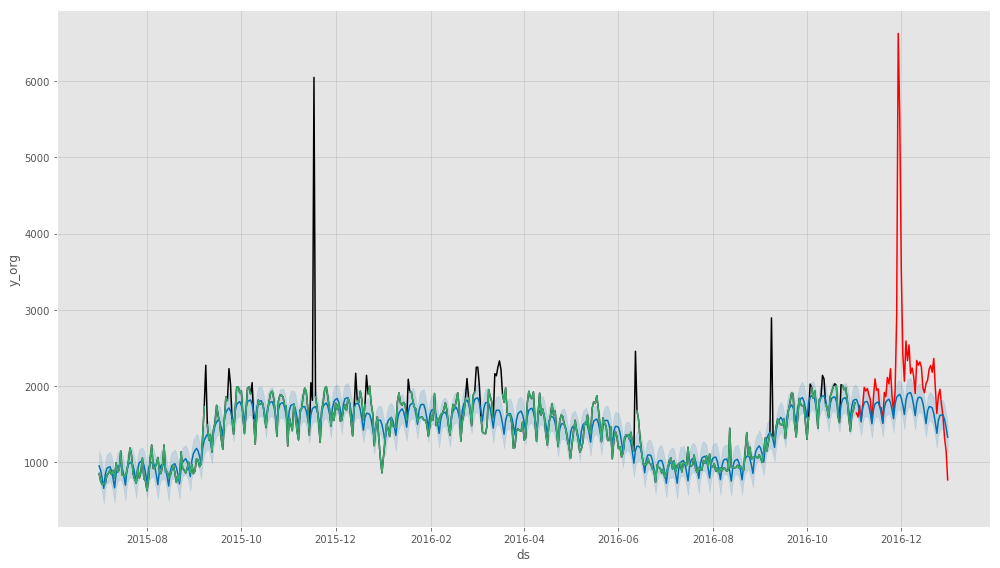

In [86]:
for row in df[(df[VERSION[:-1]+'_val'] > 20)].sort_values(
    by=VERSION[:-1]+'_val',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0])
    print('v1.6_val', row[1][2])
    load_plot(row[1][0])

In [ ]:
for row in df[(df[VERSION[:-1]+'_val'] > 30)].sort_values(
    by=VERSION[:-1]+'_val',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0])
    print('v1.6_val', row[1][2])
    load_plot(row[1][0])

In [ ]:
for row in df[(df[VERSION[:-1]+'_val'] > 40)].sort_values(
    by=VERSION[:-1]+'_val',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0])
    print('v1.6_val', row[1][2])
    load_plot(row[1][0])

In [ ]:
for row in df[(df[VERSION[:-1]+'_val'] > 70)].sort_values(
    by=VERSION[:-1]+'_val',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0])
    print('v1.6_val', row[1][2])
    load_plot(row[1][0])

In [1]:
for row in df[(df[VERSION[:-1]+'_val'] > 150)].sort_values(
    by=VERSION[:-1]+'_val',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0])
    print('v1.6_val', row[1][2])
    load_plot(row[1][0])

NameError: name 'df' is not defined

# Testing fillna(0) vs no fill on series that has sudden start?

## Consistent Low Views E.g.

In [ ]:
15291

In [100]:
MODEL_VERSION = 'v2/'

In [101]:
tforecast = pd.read_feather(PROPHET_PATH+VERSION+'15291'+'df.f')
with open(PROPHET_PATH+MODEL_VERSION+'15291'+'m.pk', 'rb') as file:
    tm = pk.load(file)

In [102]:
tforecast

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,...,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat,yhat_org,y,train,y_org
0,2015-07-01,0.000000,1.506973,0.424733,0.424733,1.506973,1.506973,0.403156,3.597153,0.035027,...,0.035027,0.389707,0.389707,0.389707,0.424733,2,1.931706,0.0,1.0,0.001
1,2015-07-02,0.002045,1.507777,0.168968,0.168968,1.507777,1.507777,0.073103,3.321964,-0.170226,...,-0.170226,0.339193,0.339193,0.339193,0.168968,2,1.676744,0.0,1.0,0.000
2,2015-07-03,0.004090,1.508580,0.222272,0.222272,1.508580,1.508580,0.173382,3.345391,-0.065058,...,-0.065058,0.287330,0.287330,0.287330,0.222272,2,1.730852,1.0,1.0,1.000
3,2015-07-04,0.006135,1.509384,0.400125,0.400125,1.509384,1.509384,0.208912,3.423990,0.165336,...,0.165336,0.234788,0.234788,0.234788,0.400125,2,1.909509,0.0,1.0,0.000
4,2015-07-05,0.008180,1.510188,-0.069417,-0.069417,1.510188,1.510188,-0.124274,3.094450,-0.251703,...,-0.251703,0.182286,0.182286,0.182286,-0.069417,1,1.440771,1.0,1.0,1.000
5,2015-07-06,0.010225,1.510991,0.536627,0.536627,1.510991,1.510991,0.406305,3.656173,0.406062,...,0.406062,0.130565,0.130565,0.130565,0.536627,2,2.047619,1.0,1.0,1.000
6,2015-07-07,0.012270,1.511795,-0.039062,-0.039062,1.511795,1.511795,-0.291295,3.169564,-0.119438,...,-0.119438,0.080376,0.080376,0.080376,-0.039062,1,1.472733,1.0,1.0,1.000
7,2015-07-08,0.014315,1.512598,0.067482,0.067482,1.512598,1.512598,-0.063053,3.115844,0.035027,...,0.035027,0.032456,0.032456,0.032456,0.067482,2,1.580081,2.0,1.0,2.000
8,2015-07-09,0.016360,1.513402,-0.182718,-0.182718,1.513402,1.513402,-0.203458,2.966331,-0.170226,...,-0.170226,-0.012492,-0.012492,-0.012492,-0.182718,1,1.330684,0.0,1.0,0.000
9,2015-07-10,0.018405,1.514206,-0.118873,-0.118873,1.514206,1.514206,-0.219694,2.984842,-0.065058,...,-0.065058,-0.053815,-0.053815,-0.053815,-0.118873,1,1.395332,2.0,1.0,2.000


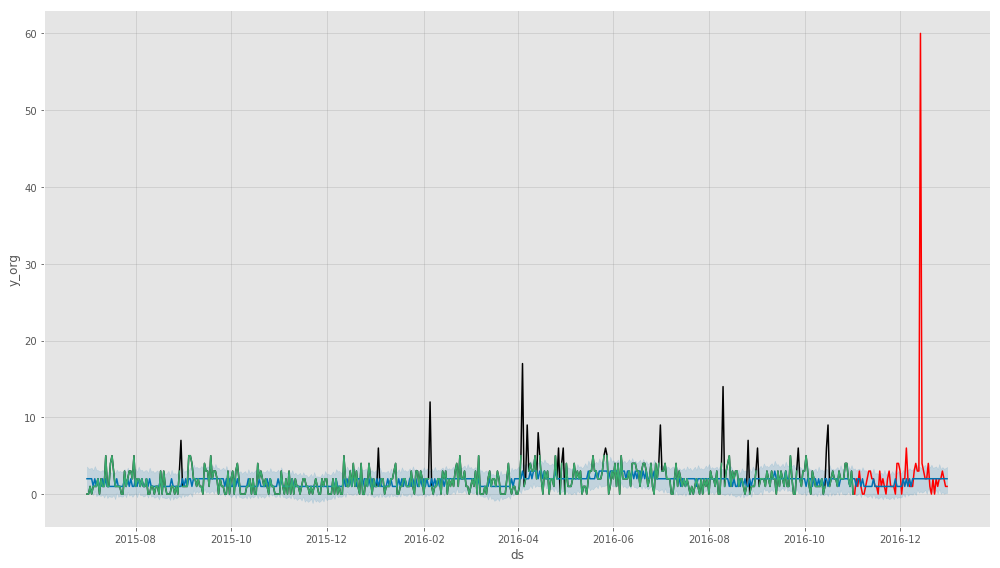

In [103]:
wiki.newphet.prophet_plot(tforecast)

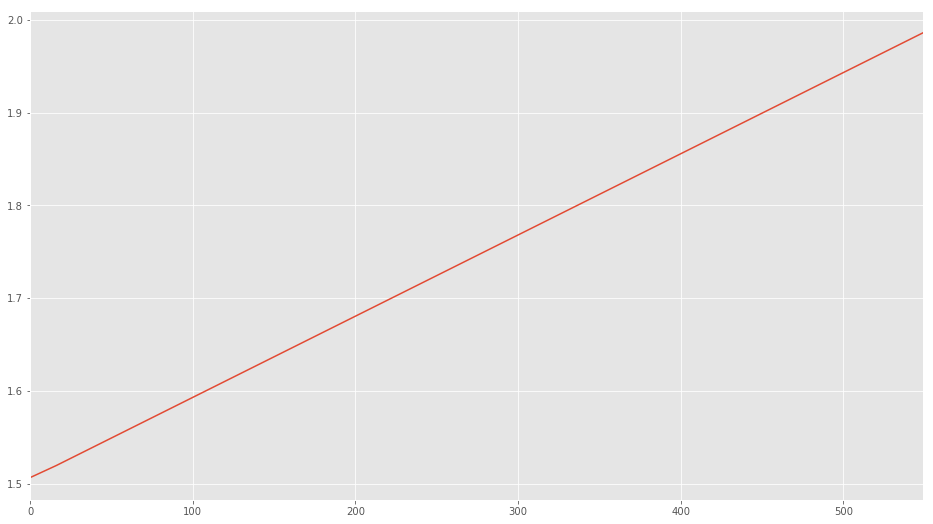

In [104]:
tforecast.trend.plot()

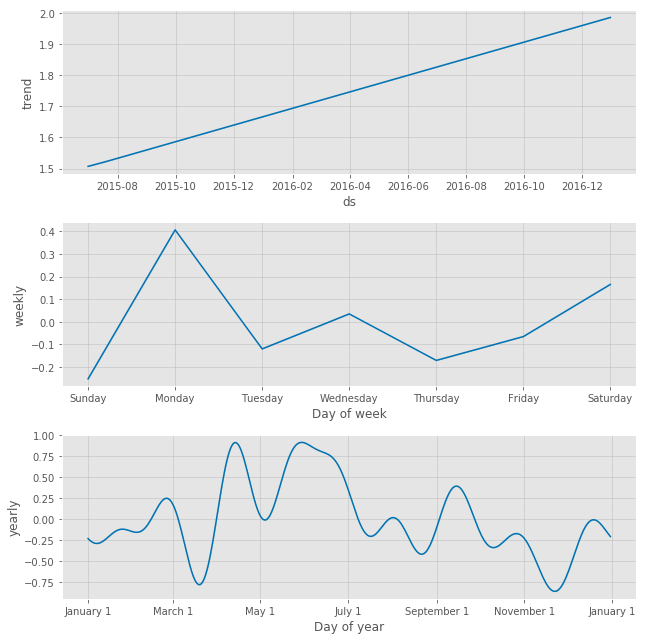

In [106]:
tm.plot_components(tforecast);

In [109]:
tm.changepoints

15    2015-07-16
30    2015-07-31
45    2015-08-15
61    2015-09-01
76    2015-09-16
91    2015-10-01
106   2015-10-16
121   2015-10-31
136   2015-11-15
152   2015-12-01
167   2015-12-16
182   2015-12-31
197   2016-01-16
212   2016-01-31
227   2016-02-16
243   2016-03-03
258   2016-03-18
273   2016-04-02
288   2016-04-20
303   2016-05-07
318   2016-05-22
334   2016-06-08
349   2016-06-23
364   2016-07-09
379   2016-07-24
Name: ds, dtype: datetime64[ns]